**Integrantes: Nicolas Fernandez - Mauro Fiore - Nicolas Campanario**


**Nuestro dataset**: CIFAR-10, una recopilacion de 60,000 imagenes de 32x32 pixeles, que se dividen en 10 categorias.

Nosotros vamos a usar el que viene integrado con Keras

Kaggle: https://www.kaggle.com/c/cifar-10/data

Csv:
https://drive.google.com/file/d/1IPS0kzSsIeDsLJLmyyTbG5zDI3y_jThI/view?usp=sharing

In [34]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix

In [35]:
#Leer dataset directo de Keras

df = datasets.cifar10.load_data()
df

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [36]:
# Cargar el dataset de Keras y dividirlo en train/test split
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Convertir las imagenes a valores de 0 a 1 para facilitar el entrenamiento
x_train, x_test = x_train / 255.0, x_test / 255.0

# Tamaño de los datos
print(f"Train: {x_train.shape}, Test: {x_test.shape}")

Train: (50000, 32, 32, 3), Test: (10000, 32, 32, 3)


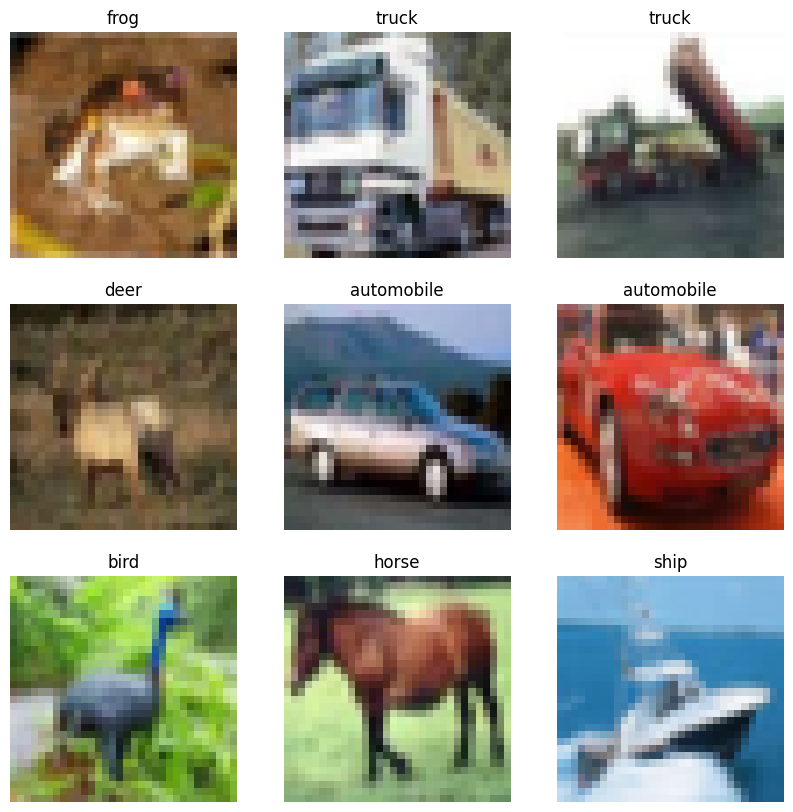

In [37]:
# Darle nombres a los labels del dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#Mostrar algunas imagenes
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()


In [38]:
model = models.Sequential([

    # Activar layer convolucional de input
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    # Segundo layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # Tercer layer
    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(), #Convertir el output 2D a 1D

    layers.Dense(64, activation='relu'),

    #Output para que claifique entre 10 clases/categorias
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
#5 epochs: accuracy = 70

#Entrenar modelo con 10 epochs
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.3539 - loss: 1.7523 - val_accuracy: 0.5133 - val_loss: 1.3464
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.5808 - loss: 1.1751 - val_accuracy: 0.5931 - val_loss: 1.1235
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 43ms/step - accuracy: 0.6450 - loss: 1.0159 - val_accuracy: 0.6511 - val_loss: 0.9871
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 41ms/step - accuracy: 0.6791 - loss: 0.9081 - val_accuracy: 0.6775 - val_loss: 0.9285
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.7085 - loss: 0.8340 - val_accuracy: 0.6698 - val_loss: 0.9470
Epoch 6/10
 853/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 39ms/step - accuracy: 0.7293 - loss: 0.7667

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")


In [ ]:
plt.plot(history.history['accuracy'])

In [ ]:
# Make predictions on the first 5 test images
predictions = model.predict(x_test[:25])

# Plot the test images with their predictions
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[i])
    plt.title(f"Pred: {class_names[predictions[i].argmax()]}\nTrue: {class_names[y_test[i][0]]}")
    plt.axis('off')
plt.show()

In [ ]:
# Predecir 9 imagenes para testear la accuracy
predictions = model.predict(x_test[:9])

# Plottear las predicciones en una tabla 3x3
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i])
    predicted_label = class_names[predictions[i].argmax()]
    true_label = class_names[y_test[i][0]]

    # Cambiar el color si esta bien o mal (rojo o negro)
    color = "green" if predicted_label == true_label else "red"
    plt.title(f"Pred: {predicted_label}\nTrue: {true_label}", color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
#Predecir todo el x_test
y_pred = np.argmax(model.predict(x_test), axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Mapear los resultados
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Prediccion')
plt.ylabel('Verdadero')
plt.title('Confusion Matrix')
plt.show()